In [12]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

import requests
from io import BytesIO
from PIL import Image

In [2]:
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 11s 0us/step


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

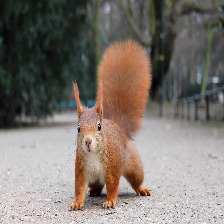

In [16]:
url_img = 'https://upload.wikimedia.org/wikipedia/commons/0/02/Eichh%C3%B6rnchen_D%C3%BCsseldorf_Hofgarten_edit.jpg'
response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((224, 224))
img

In [18]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [19]:
y_pred = model.predict(X)

In [22]:
decode_predictions(y_pred, top=10)

[[('n02454379', 'armadillo', 0.14501765),
  ('n02356798', 'fox_squirrel', 0.09168099),
  ('n02093647', 'Bedlington_terrier', 0.08464421),
  ('n02328150', 'Angora', 0.06314635),
  ('n01877812', 'wallaby', 0.05795541),
  ('n03794056', 'mousetrap', 0.04781951),
  ('n02396427', 'wild_boar', 0.029140742),
  ('n02326432', 'hare', 0.027239345),
  ('n01883070', 'wombat', 0.02240625),
  ('n02395406', 'hog', 0.01863983)]]